In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalizar(datos):
    if(datos.ndim==1):
        return (datos - datos.min()) / (datos.max() - datos.min())
    else:
    
        ndatos=np.zeros ((datos.shape[0],datos.shape[1]))
        for a in range(datos.shape[1]):
            if(datos[:,a].min()<datos[:,a].max()):
                col=(datos[:,a] - datos[:,a].min()) / (datos[:,a].max() - datos[:,a].min())
            else:
                col=datos[:,a]
            ndatos[:,a]=col
        return ndatos

68


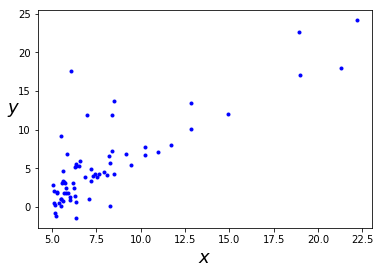

In [12]:
x_train = pd.read_csv('train_ex1data1.csv')
y_train = pd.read_csv('y_train_ex1data1.csv')
x_test = pd.read_csv('test_ex1data1.csv')
y_test = pd.read_csv('y_test_ex1data1.csv')

x_train = x_train.iloc[:,:]
y_train = y_train.iloc[:,0]
x_test = x_test.iloc[:,:]
y_test = y_test.iloc[:,0]
m1 = np.ones((x_train.shape[0],1))
m2 = np.ones((x_test.shape[0],1))



grafica=plt.plot(x_train,y_train,'b.')
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)

x_train=np.concatenate(( m1,x_train), axis=1)
x_test=np.concatenate(( m2,x_test), axis=1)

In [5]:
#Normalizar
x_train = normalizar(x_train)
y_train = normalizar(y_train)

In [6]:

x_train_t = x_train.transpose()
# (x^t * x) 
p1 = np.dot(x_train_t,x_train)
# p1 inversa
p11 = np.linalg.inv(p1)
# p11 * x^t
p2 = np.dot(p11,x_train_t)
# p2 * y_train
p3 = np.dot(p2,y_train)
theta = p3
# NROMALIZADO
print(theta)

[0.13364969 0.79353276]


In [12]:

def cal_cost(theta,x,y):
    m = x.shape[0]
    pred = x.dot(theta)
    cost = (1/2*m)* np.sum(np.square(pred[:,0]-y))  
    return cost


def gradiente(x,y,theta,alpha,itera):
    m = x.shape[0]
    cost_h = np.zeros(itera)
    theta_h = np.zeros ((itera,x.shape[1]))
    for ite in range(itera):
        pred = x.dot(theta)
        theta[:,0] = theta[:,0] - ((1/m) * alpha) * (x.T.dot(pred[:,0]-y))
        theta_h[ite,:] = theta.T
        cost_h[ite] = cal_cost(theta,x,y)
        
    return theta,theta_h,cost_h


iteraciones = 1000
alph = 0.1
theta = np.random.randn (2,1)

theta,theta_h,cost_h=gradiente(x_train,y_train,theta,alph,iteraciones)
print(theta)

[[0.13715879]
 [0.77335939]]


[0 1 2 3 4]


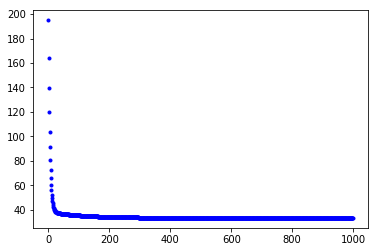

In [34]:
#def fn(dato):
#    return dato*2
#x = np.array([(100, 2),(2,123),(23,1)])
#vf = np.vectorize(fn)
#print(vf(x))
#np.arange(5)

grafica=plt.plot(np.arange(cost_h.shape[0]),cost_h,'b.')

print (a)